# 1. 딥러닝을 활용하게 된 계기 - XOR게이트 문제를 풀기 위해!

### AND_gate

In [2]:
## 회귀식 = 활성화 식 -> 활성화 함수 (Activation Function)

def and_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = w1*x1 + w2*x2 + b
    
    if result <=0:
        return 0
    
    else :
        return 1

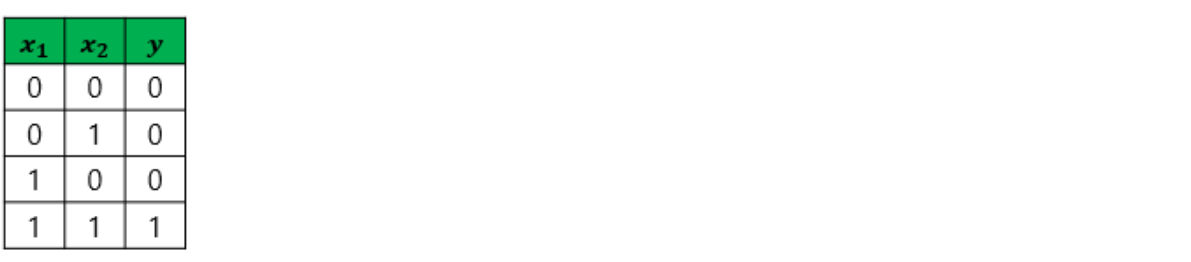

In [3]:
print(and_gate(0,0), and_gate(0,1), and_gate(1,0), and_gate(1,1))

0 0 0 1


### NAND_gate

In [4]:
def nand_gate(x1, x2):
    w1 = -0.5 # weight1 :: 가중치1
    w2 = -0.5 # weight2 :: 가중치2
    b = +0.7 # bias 편향
    result = w1*x1 + w2*x2 + b
    
    if result <=0:
        return 0
    
    else :
        return 1

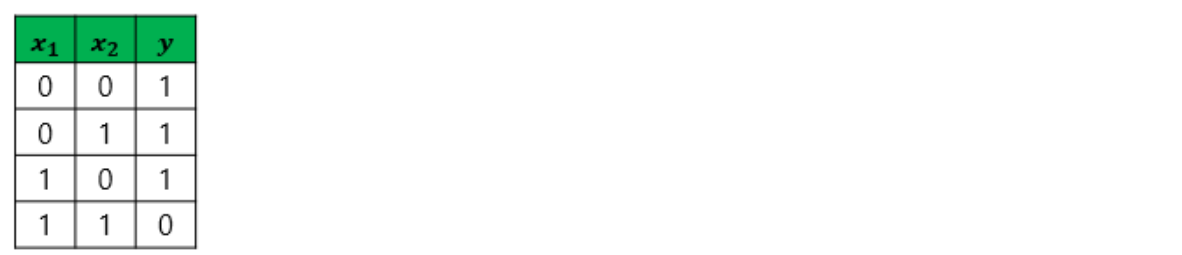

In [5]:
print(nand_gate(0,0), nand_gate(0,1), nand_gate(1,0), nand_gate(1,1))

1 1 1 0


### OR_gate

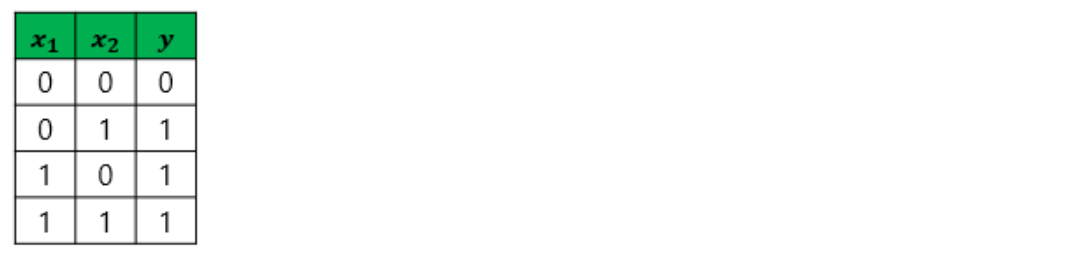

In [6]:
# 식의 변화는 없었고
# 가중치와 편향의 값만 갱신되었다... 

def or_gate(x1, x2):
    w1 = 0.6 # weight1 :: 가중치1
    w2 = 0.6 # weight2 :: 가중치2
    b = -0.5 # bias 편향
    result = w1*x1 + w2*x2 + b # <- 활성화함수로 다룸... 
    
    if result <=0:
        return 0
    
    else :
        return 1

In [7]:
print(or_gate(0,0), or_gate(0,1), or_gate(1,0), or_gate(1,1))

0 0 0 1


# 2. 활성화함수(activation function)의 종류

## * 은닉층에서 활용되는 함수

#### (1) 계단함수(Step function)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def step_f(x):
    y = np.array(x>0, dtype = np.int)
    return y

C:\Users\student\AppData\Local\Temp\ipykernel_14252\472409274.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(x>0, dtype = np.int)


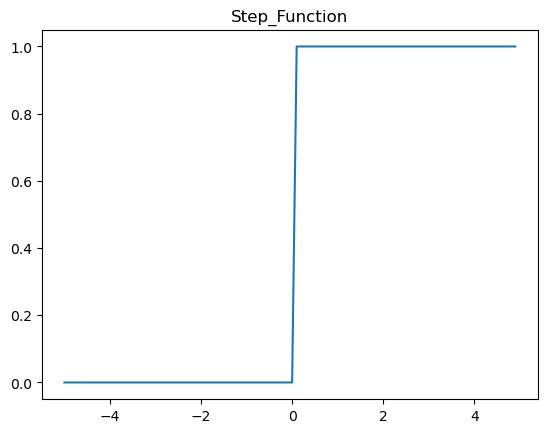

In [17]:
X = np.arange(-5.0, 5.0, 0.1) # - 5.0 ~ + 5.0까지 0.1 간격 생성
y = step_f(X)

plt.title('Step_Function')
plt.plot(X,y)
plt.show()

계단함수(Step Function)는 거의 사용되지 않지만 인공신경망을 처음 배울 때 접하게 되는 활성화 함수입니다.

### (2) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

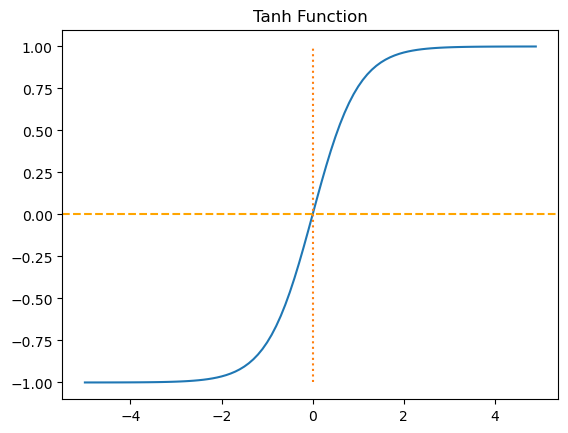

In [36]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0 ~ 5.0까지 0.1의 간격생성
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[-1.0 ,1.0], ':') # 콜론으로 점선을 추가해본다.
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

### (3) 렐루 함수(ReLU)

인공신경망 은닉층에서 가장 인기가 있는 함수이다. 

수식은 f(x) = max(0,x)

In [37]:
def my_relu(x):
    return np.maximum(0,x)

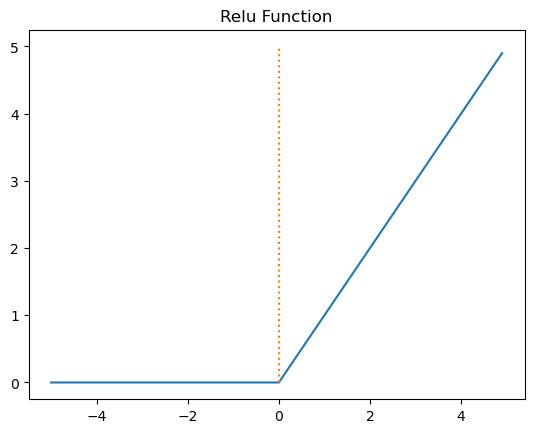

In [43]:
x= np.arange(-5.0 , 5.0, 0.1)
y= my_relu(x)

plt.plot(x,y)
plt.plot([0,0],[0 ,5], ':') # 콜론으로 점선을 추가해본다.
plt.title('Relu Function')
plt.show()


### (4) 리키 렐루 함수(Leaky ReLU)

In [45]:
a = 0.1

def my_leaky_relu(x):
    return np.maximum(a*x,x)

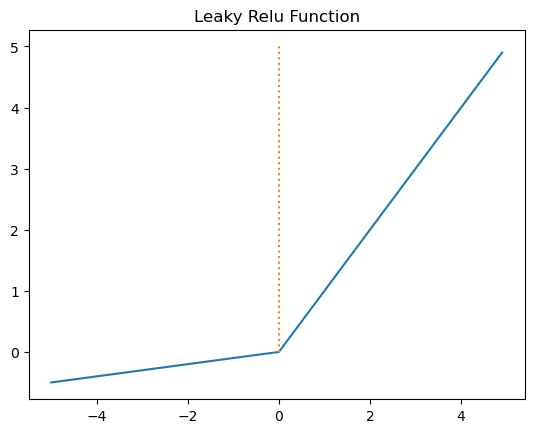

In [46]:
x= np.arange(-5.0 , 5.0, 0.1)
y= my_leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[0 ,5], ':') # 콜론으로 점선을 추가해본다.
plt.title('Leaky Relu Function')
plt.show()

# 2-1. 활성화함수(activation function)의 종류

### 출력층에서 활용되는 함수

#### (1) 시그모이드(Sigmoid Function)와 기울기 소실

우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(오차라고도 부릅니다. loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation)를 수행합니다. 역전파에 대해서는 뒤에서 더 자세히 설명하겠지만 일단 여기에서는 인공 신경망에서 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정이라고만 언급해두겠습니다. 역전파 과정에서 인공 신경망은 경사 하강법을 사용합니다.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
# 로지스틱 회귀분석식 참고

# K = (B0 + B1 * X1 + B2 * X2 + B3 * X3 ....)
    
#     1
# --------
# (1+e^ -K)

In [25]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    
    return y   

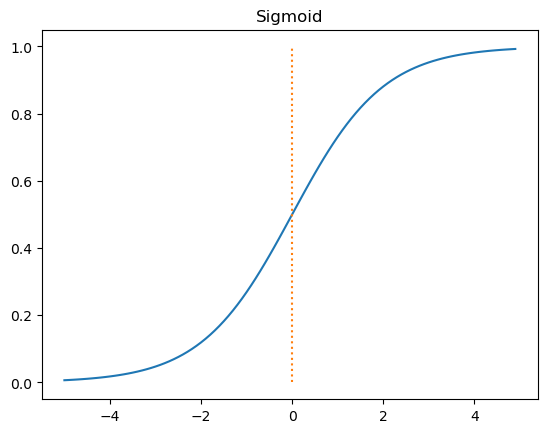

In [32]:
X = np.arange(-5.0, 5.0, 0.1) # - 5.0 ~ + 5.0까지 0.1 간격 생성
y = sigmoid(X)



plt.plot(X,y)
plt.plot([0,0],[0,1], ':') # 콜론으로 점선을 추가해본다.

plt.title('Sigmoid')
plt.show()

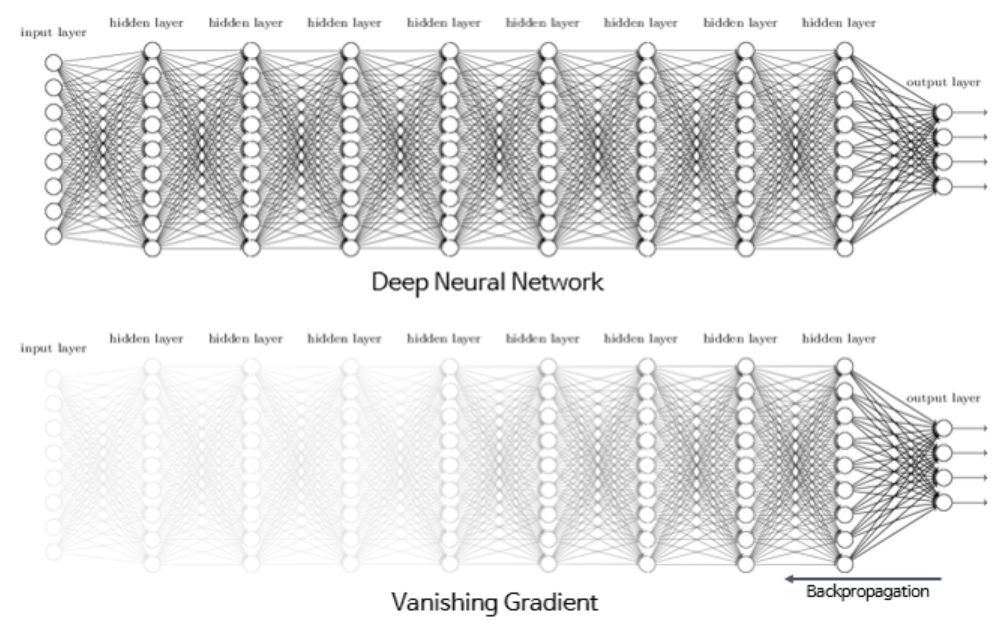

### (2) 소프트맥스 함수(Softmax function)

시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다. 

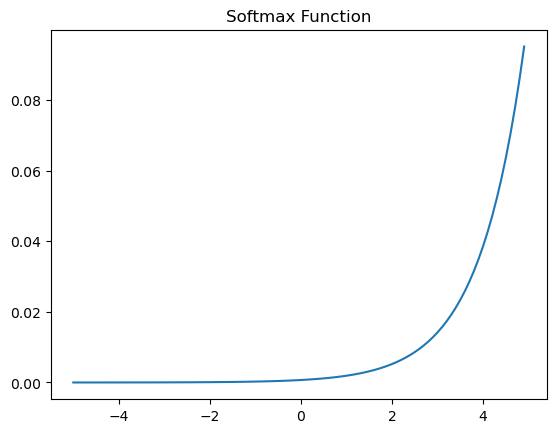

In [47]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0에서부터 5.0까지 0.1간격
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()